In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = ["10", "6"] 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Medical%20Cost%20Personal%20Datasets/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
print("Elements in data: {}\n".format(data.index.stop)) 
data.info() 

Elements in data: 1338

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<AxesSubplot:xlabel='bmi', ylabel='Count'>

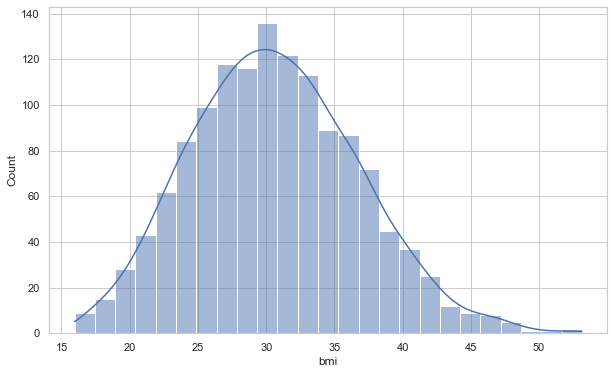

In [11]:
sns.set(style='whitegrid')
sns.histplot(data=data, x="bmi", kde=True)

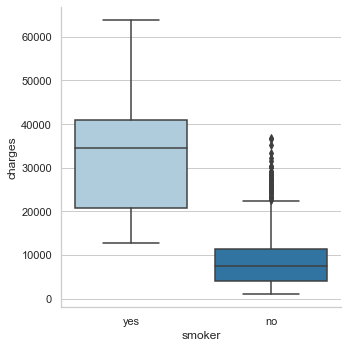

In [12]:
sns.catplot(x="smoker", y="charges", data=data, kind="box", palette="Paired")

In [13]:
data.groupby(["region","smoker"]).size().reset_index(name="count")

,region,smoker,count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


<AxesSubplot:xlabel='region', ylabel='count'>

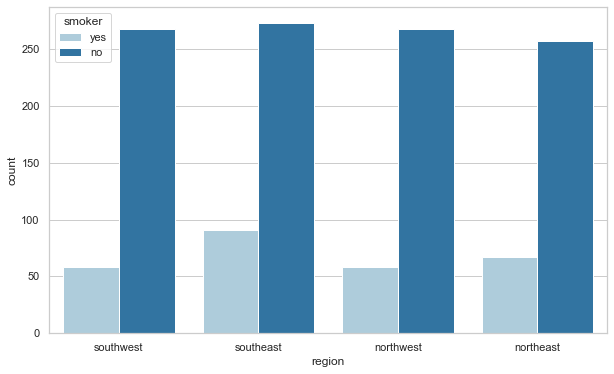

In [14]:
sns.countplot(x="region", hue="smoker", data=data, palette="Paired")

<AxesSubplot:xlabel='age', ylabel='bmi'>

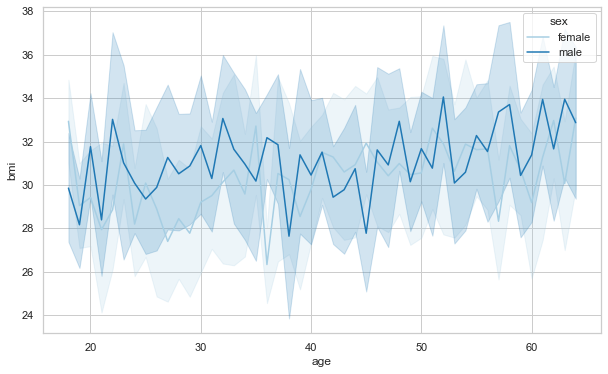

In [16]:
sns.lineplot(x="age", y="bmi", hue="sex", data=data, palette="Paired") 

In [17]:
children_count = data.groupby("region")["children"].sum()
children_count

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

<AxesSubplot:ylabel='children'>

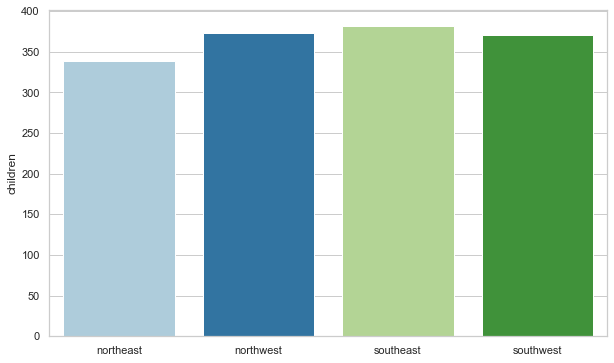

In [18]:
sns.barplot(x = children_count.index.tolist(), y = children_count, palette="Paired")

<AxesSubplot:xlabel='age', ylabel='bmi'>

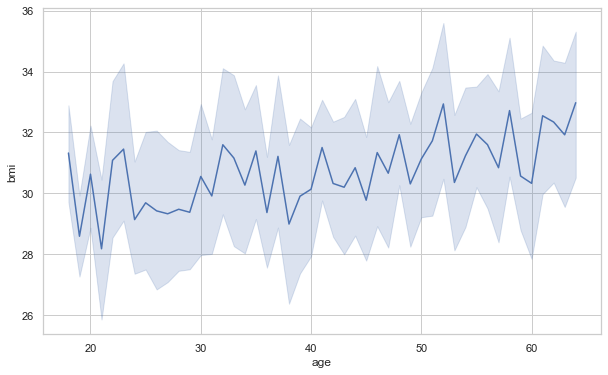

In [19]:
sns.lineplot(x="age", y="bmi", data=data, palette="Paired")

In [20]:
data.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


<AxesSubplot:xlabel='children', ylabel='bmi'>

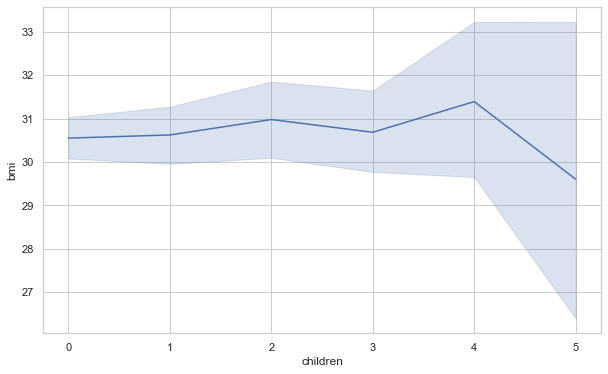

In [21]:
sns.lineplot(x = "children", y = "bmi", data=data)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

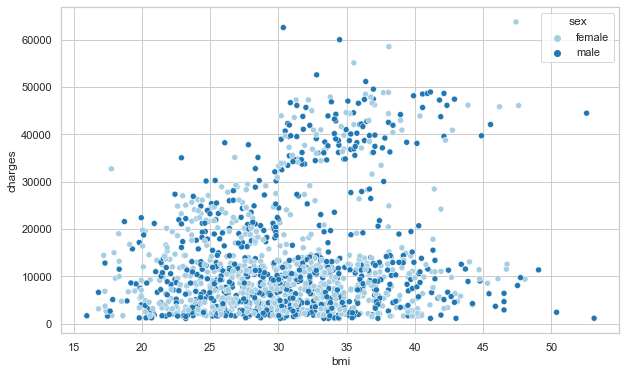

In [22]:
sns.scatterplot(x = "bmi", y="charges", hue="sex", data=data, palette="Paired")

<AxesSubplot:xlabel='region', ylabel='bmi'>

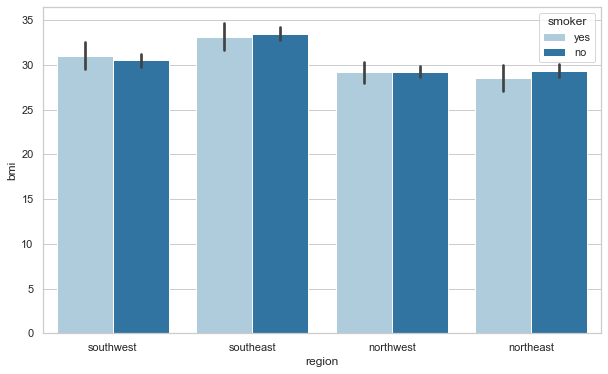

In [23]:
sns.barplot(x = "region", y = "bmi", hue = "smoker", data=data, palette="Paired")

In [24]:
encoded_data = pd.get_dummies(data = data, columns=["sex", "smoker", "region"])
encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [25]:
sorted_bmi = encoded_data["bmi"].sort_values()
Q1 = np.percentile(sorted_bmi, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sorted_bmi, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sorted_bmi, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the BMI values is, ', Q1)
print('Q1 50 percentile of the BMI values is, ', Q2)
print('Q1 75 percentile of the BMI values is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the BMI values is,  26.302500000000002
Q1 50 percentile of the BMI values is,  30.4
Q1 75 percentile of the BMI values is,  34.6875
Interquartile range is 8.384999999999998


In [26]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 13.725000000000005
up_limit is 47.265


In [27]:
outliers =[]
for x in sorted_bmi:
    if ((x> up_lim) or (x<low_lim)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]


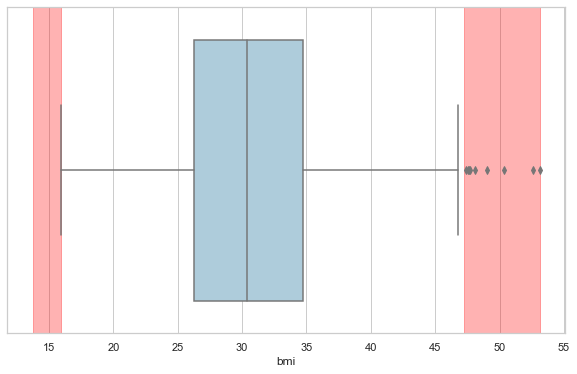

In [28]:
sns.boxplot(sorted_bmi, palette="Paired")
plt.axvspan(xmin = low_lim, xmax = sorted_bmi.min(), alpha=0.3, color='red')
plt.axvspan(xmin = up_lim, xmax = sorted_bmi.max(), alpha=0.3, color='red')

In [29]:
clean_data = encoded_data[encoded_data["bmi"] < 47.41]
clean_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


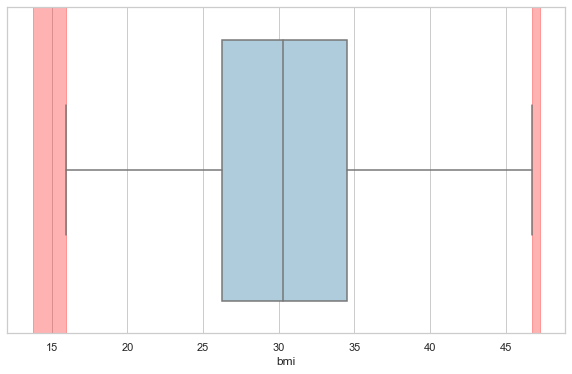

In [30]:
sns.boxplot(clean_data["bmi"].sort_values(), palette="Paired")
plt.axvspan(xmin = low_lim, xmax = clean_data["bmi"].sort_values().min(), alpha=0.3, color='red')
plt.axvspan(xmin = up_lim, xmax = clean_data["bmi"].sort_values().max(), alpha=0.3, color='red')

In [31]:
from sklearn.model_selection import train_test_split

X = clean_data.drop(["charges"], axis=1)
y = clean_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(X_train),type(X_test),type(y_train),type(y_test))

2 2 1 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [32]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [X_train, X_test, y_train, y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

[38.99139785 30.51281183  1.11075269  0.51612903  0.48387097  0.79892473
  0.20107527  0.24731183  0.2311828   0.27096774  0.25053763]
[39.69924812 30.59453634  1.06265664  0.44862155  0.55137845  0.78947368
  0.21052632  0.23308271  0.27568922  0.26315789  0.22807018]
[12959.29163719]
[13802.12990466]


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear_regression_model = LinearRegression()

knn_model = KNeighborsRegressor(n_neighbors=7)

tree_model = DecisionTreeRegressor(max_depth = 3)

random_forest_model = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada_model = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gradient_boosting_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb_model = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2, objective = "reg:squarederror")
regressors = [('Linear Regression', linear_regression_model), 
              ('k Nearest Neighbours', knn_model),
              ('Decision Tree', tree_model),
              ('Random Forest', random_forest_model),
              ('AdaBoost', ada_model),
              ('Gradient Boosting Regressor', gradient_boosting_model), 
              ('XGBoost', xgb_model)]
r2_scores = []

for regressor_name, model in regressors:
    
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring="r2")
    r2_scores.append(scores.mean()*100)

    print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/5*100,3))+"%\n")

Linear Regression r2 Score: 74.865%

k Nearest Neighbours r2 Score: 16.998%

Decision Tree r2 Score: 85.404%

Random Forest r2 Score: 86.184%

AdaBoost r2 Score: 85.666%

Gradient Boosting Regressor r2 Score: 85.427%

XGBoost r2 Score: 86.049%



In [35]:
from sklearn.model_selection import GridSearchCV


xgb = XGBRegressor()

parameters = {
              'eta': [.03, .07, 0.1], #(eta or shrinkage)
              "min_child_weight": [.5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8601056936909298
{'eta': 0.07, 'max_depth': 4, 'min_child_weight': 0.5}


In [36]:
rmse = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.5), X_train, y_train ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (rmse, 3))

rmae = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.5), X_train, y_train ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (rmae, 3))

r2 = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.5), X_train, y_train ,cv=5, scoring = "r2").mean() # Generally used to determine how good is the model. 
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")

Mean Squared Error of XGBoost: (array([-24474342.05433797, -17487229.3669149 , -23064656.5153028 ,
       -16515661.09950668, -15990331.52195701]), 3)
Mean Absolute Error of XGBoost: (array([-2503.9484413 , -2615.20171974, -2576.76258727, -2144.06917456,
       -2200.38897812]), 3)
r2 Score of XGBoost: 86.0106%



In [37]:
!pwd

/Users/thomo/Bencode/Finance
